In [1]:
# https://biblio.wiki/wiki/Casino_Royale
import nltk
from nltk.corpus import stopwords
import math
%matplotlib inline

raw1 = open('Across_the_River_Into_the_Trees.txt').read()

In [2]:
raw1

"THEY started two hours before daylight, and at first, it was not necessary to break the ice across the canal as other boats had gone on ahead. In each boat, in the darkness, so you could not see, but only hear him; the poler stood in the stern, with his long oar. The shooter sat on a shooting stool fastened to the top of a box that contained his lunch and shells, and the shooter’s two, or more, guns, were propped against the load of wooden decoys. Somewhere, in each boat, there was a sack with one or two live mallard hens, or a hen and a drake, and in each boat there was a dog who shifted and shivered uneasily at the sound of the wings of the ducks that passed overhead in the darkness.\n\nFour of the boats went on up the main canal toward the big lagoon to the north. A fifth boat had already turned off into a side canal. Now, the sixth boat turned south into a shallow lagoon, and there was no broken water.\n\nIt was all ice, new-frozen during the sudden, windless cold of the night. It

In [3]:
tokens1 = nltk.word_tokenize(raw1)
sentence1 = nltk.sent_tokenize(raw1)

In [4]:
#The number of token
len(tokens1)

85828

In [5]:
len(sentence1)

4194

In [6]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer() #to make base form

tokens_low = [w.lower() for w in tokens1]

#The number of sort of words
len(set(tokens_low))

#複数形や過去形を別の単語としてカウントしてしまっているため，実際の異なり語数はさらに少ない

6497

In [7]:
print (len(set(tokens_low))/len(tokens1))

0.07569790744279256


In [8]:
list1 = [tokens1]

text = []
for i in list1:
    text.append(nltk.Text(i))
    
text

[<Text: THEY started two hours before daylight , and...>]

In [9]:
freq_list = []
for i in text:
    freq_list.append(nltk.FreqDist(w.lower() for w in i))

stopwords = nltk.corpus.stopwords.words('english')
symbols = ["'", '"', '`', '.', ',', '-', '!', '?', ':', ';', '(', ')', '...', "'s", '’', '”', '“','–','—', '…', '*' ,'``', "''",'--','mr.',"n't", 'dr.','sir', '‘', 'mr', 'm.' ]

In [10]:
freq_list

[FreqDist({'they': 587,
           'started': 18,
           'two': 100,
           'hours': 8,
           'before': 58,
           'daylight': 6,
           ',': 4457,
           'and': 2358,
           'at': 372,
           'first': 62,
           'it': 1323,
           'was': 804,
           'not': 590,
           'necessary': 10,
           'to': 1375,
           'break': 16,
           'the': 4459,
           'ice': 40,
           'across': 28,
           'canal': 52,
           'as': 485,
           'other': 100,
           'boats': 10,
           'had': 431,
           'gone': 27,
           'on': 365,
           'ahead': 21,
           '.': 4033,
           'in': 918,
           'each': 40,
           'boat': 46,
           'darkness': 4,
           'so': 197,
           'you': 1625,
           'could': 191,
           'see': 116,
           'but': 501,
           'only': 128,
           'hear': 21,
           'him': 255,
           ';': 108,
           'poler': 3,
           '

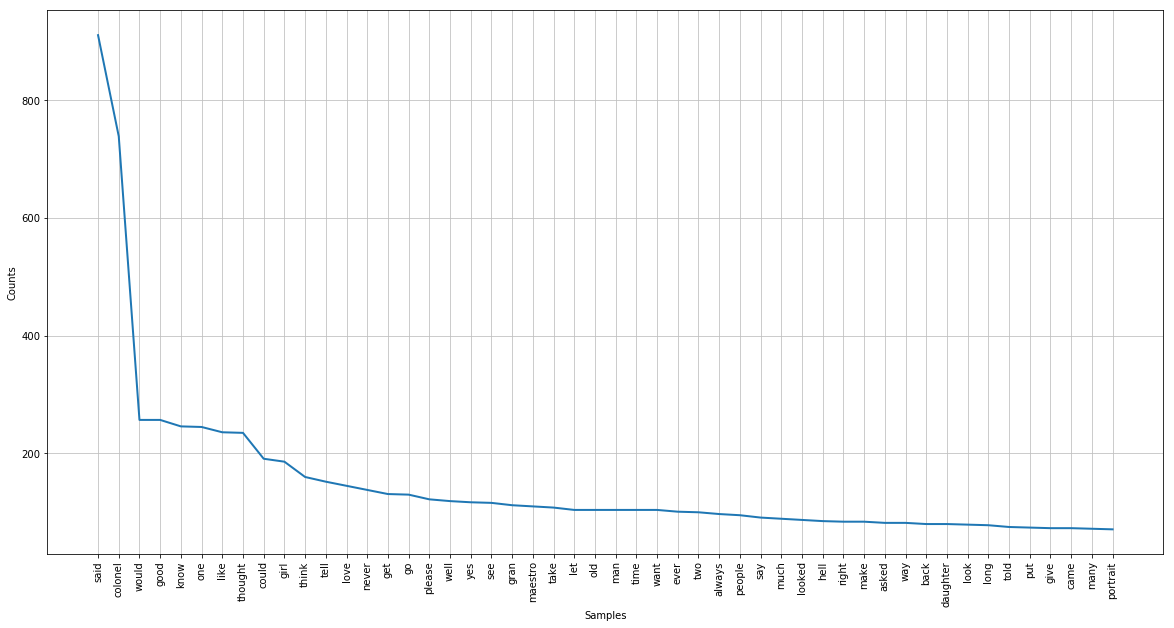

In [11]:
#Eliminate stopwords and symbols

import matplotlib.pyplot as plt
%matplotlib inline

freq_list_new = []
for i in text:
    freq_list_new.append(nltk.FreqDist(w.lower() for w in i if w.lower() not in stopwords + symbols))

for i in freq_list_new:
    plt.figure(figsize=(20,10))
    i.plot(50)

In [12]:
#順位チェック
sorted(freq_list_new[0].items(), key=lambda x: x[1], reverse=True)

[('said', 911),
 ('colonel', 739),
 ('would', 257),
 ('good', 257),
 ('know', 246),
 ('one', 245),
 ('like', 236),
 ('thought', 235),
 ('could', 191),
 ('girl', 186),
 ('think', 160),
 ('tell', 152),
 ('love', 145),
 ('never', 138),
 ('get', 131),
 ('go', 130),
 ('please', 122),
 ('well', 119),
 ('yes', 117),
 ('see', 116),
 ('gran', 112),
 ('maestro', 110),
 ('take', 108),
 ('let', 104),
 ('old', 104),
 ('man', 104),
 ('time', 104),
 ('want', 104),
 ('ever', 101),
 ('two', 100),
 ('always', 97),
 ('people', 95),
 ('say', 91),
 ('much', 89),
 ('looked', 87),
 ('hell', 85),
 ('right', 84),
 ('make', 84),
 ('asked', 82),
 ('way', 82),
 ('back', 80),
 ('daughter', 80),
 ('look', 79),
 ('long', 78),
 ('told', 75),
 ('put', 74),
 ('give', 73),
 ('came', 73),
 ('many', 72),
 ('portrait', 71),
 ('better', 70),
 ('made', 69),
 ('nothing', 69),
 ('really', 69),
 ('things', 68),
 ('maybe', 67),
 ('it.', 66),
 ('hand', 65),
 ('except', 65),
 ('bad', 64),
 ('boy', 64),
 ('knew', 63),
 ('anything',

In [13]:
#Turn all words to basic form
basic_form = [ps.stem(word) for word in tokens_low if not word in stopwords + symbols]

In [14]:
#Textを使うためにreviewをlistにぶち込む
basic_form = [basic_form]

In [15]:
#原型に戻した単語で、再び文を再構築する。
text = []
for i in basic_form:
    text.append(nltk.Text(i))
    
text

[<Text: start two hour daylight first necessari break ice...>]

In [16]:
#Textからwords listを作る。
for i in text:
    words = [word for word in i]
    
words

['start',
 'two',
 'hour',
 'daylight',
 'first',
 'necessari',
 'break',
 'ice',
 'across',
 'canal',
 'boat',
 'gone',
 'ahead',
 'boat',
 'dark',
 'could',
 'see',
 'hear',
 'poler',
 'stood',
 'stern',
 'long',
 'oar',
 'shooter',
 'sat',
 'shoot',
 'stool',
 'fasten',
 'top',
 'box',
 'contain',
 'lunch',
 'shell',
 'shooter',
 'two',
 'gun',
 'prop',
 'load',
 'wooden',
 'decoy',
 'somewher',
 'boat',
 'sack',
 'one',
 'two',
 'live',
 'mallard',
 'hen',
 'hen',
 'drake',
 'boat',
 'dog',
 'shift',
 'shiver',
 'uneasili',
 'sound',
 'wing',
 'duck',
 'pass',
 'overhead',
 'dark',
 'four',
 'boat',
 'went',
 'main',
 'canal',
 'toward',
 'big',
 'lagoon',
 'north',
 'fifth',
 'boat',
 'alreadi',
 'turn',
 'side',
 'canal',
 'sixth',
 'boat',
 'turn',
 'south',
 'shallow',
 'lagoon',
 'broken',
 'water',
 'ice',
 'new-frozen',
 'sudden',
 'windless',
 'cold',
 'night',
 'rubberi',
 'bend',
 'thrust',
 'boatman',
 'oar',
 'would',
 'break',
 'sharpli',
 'pane',
 'glass',
 'boat',
 '

In [17]:
#文章を小文字化
sentence_small = [w.lower() for w in sentence1]
sentence_small

['they started two hours before daylight, and at first, it was not necessary to break the ice across the canal as other boats had gone on ahead.',
 'in each boat, in the darkness, so you could not see, but only hear him; the poler stood in the stern, with his long oar.',
 'the shooter sat on a shooting stool fastened to the top of a box that contained his lunch and shells, and the shooter’s two, or more, guns, were propped against the load of wooden decoys.',
 'somewhere, in each boat, there was a sack with one or two live mallard hens, or a hen and a drake, and in each boat there was a dog who shifted and shivered uneasily at the sound of the wings of the ducks that passed overhead in the darkness.',
 'four of the boats went on up the main canal toward the big lagoon to the north.',
 'a fifth boat had already turned off into a side canal.',
 'now, the sixth boat turned south into a shallow lagoon, and there was no broken water.',
 'it was all ice, new-frozen during the sudden, windles

In [18]:
#いけそう。文ごとに取り出し、それぞれの単語を原型に戻す。それを再び再構築する！
for sentence in sentence_small:
    form = [ps.stem(word)  for word in sentence.split() if not word in stopwords + symbols]
    print (form)

['start', 'two', 'hour', 'daylight,', 'first,', 'necessari', 'break', 'ice', 'across', 'canal', 'boat', 'gone', 'ahead.']
['boat,', 'darkness,', 'could', 'see,', 'hear', 'him;', 'poler', 'stood', 'stern,', 'long', 'oar.']
['shooter', 'sat', 'shoot', 'stool', 'fasten', 'top', 'box', 'contain', 'lunch', 'shells,', 'shooter’', 'two,', 'more,', 'guns,', 'prop', 'load', 'wooden', 'decoys.']
['somewhere,', 'boat,', 'sack', 'one', 'two', 'live', 'mallard', 'hens,', 'hen', 'drake,', 'boat', 'dog', 'shift', 'shiver', 'uneasili', 'sound', 'wing', 'duck', 'pass', 'overhead', 'darkness.']
['four', 'boat', 'went', 'main', 'canal', 'toward', 'big', 'lagoon', 'north.']
['fifth', 'boat', 'alreadi', 'turn', 'side', 'canal.']
['now,', 'sixth', 'boat', 'turn', 'south', 'shallow', 'lagoon,', 'broken', 'water.']
['ice,', 'new-frozen', 'sudden,', 'windless', 'cold', 'night.']
['rubberi', 'bend', 'thrust', 'boatman’', 'oar.']
['would', 'break', 'sharpli', 'pane', 'glass,', 'boat', 'made', 'littl', 'forward',

In [19]:
#上の本番
form_sent = []
for sentence in sentence_small:
    form = [ps.stem(word)  for word in sentence.split() if not word in stopwords + symbols]
    form_sent.append(" ".join(form))

In [20]:
#ピリオドやカンマを消しまーす。Delte period and comma...めんどい...
form_sent2 = []

for i in form_sent:
    tokens = nltk.word_tokenize(i)
    form = [word for word in tokens if not word in stopwords + symbols]
    form_sent2.append(" ".join(form))
    

In [21]:
#次にこの新しく、原型に戻し、stopwordを取り除いた単語数をグラフ化したい
text = []

for i in form_sent2:
    tokens = nltk.word_tokenize(i)
    for j in tokens:
        text.append(j)

In [22]:
text = [text]

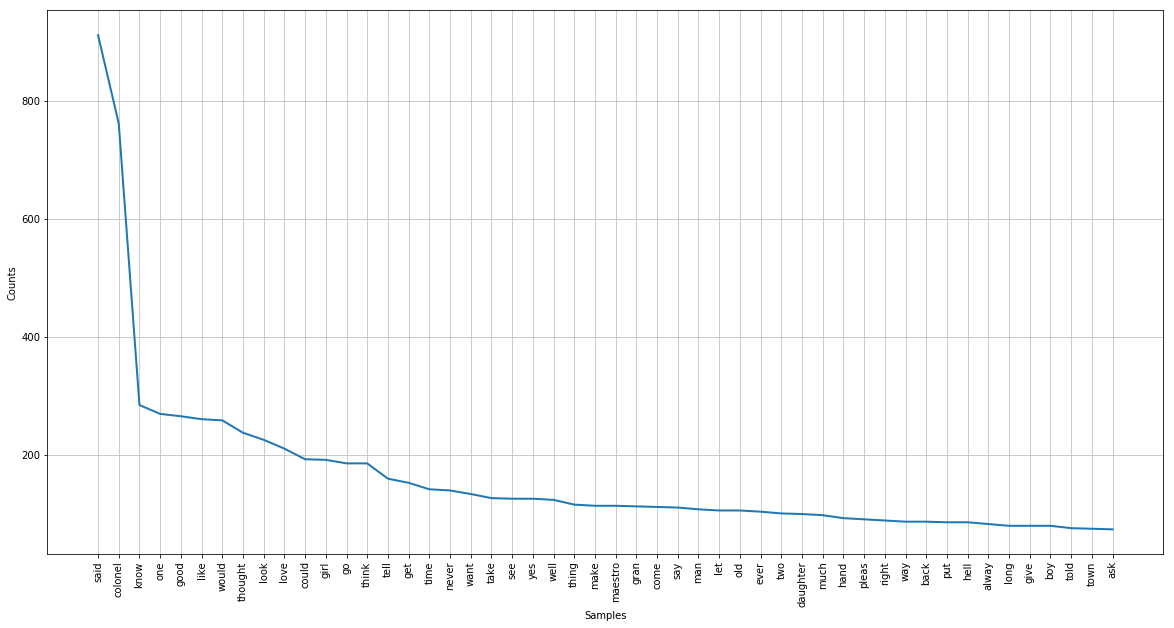

In [23]:
#新しく、原型に戻し、stopwordを取り除いた単語数をグラフ化

import matplotlib.pyplot as plt
%matplotlib inline

f_list_new = []
for i in text:
    f_list_new.append(nltk.FreqDist(w.lower() for w in i if w.lower() not in stopwords + symbols))

for i in f_list_new:
    plt.figure(figsize=(20,10))
    i.plot(50)

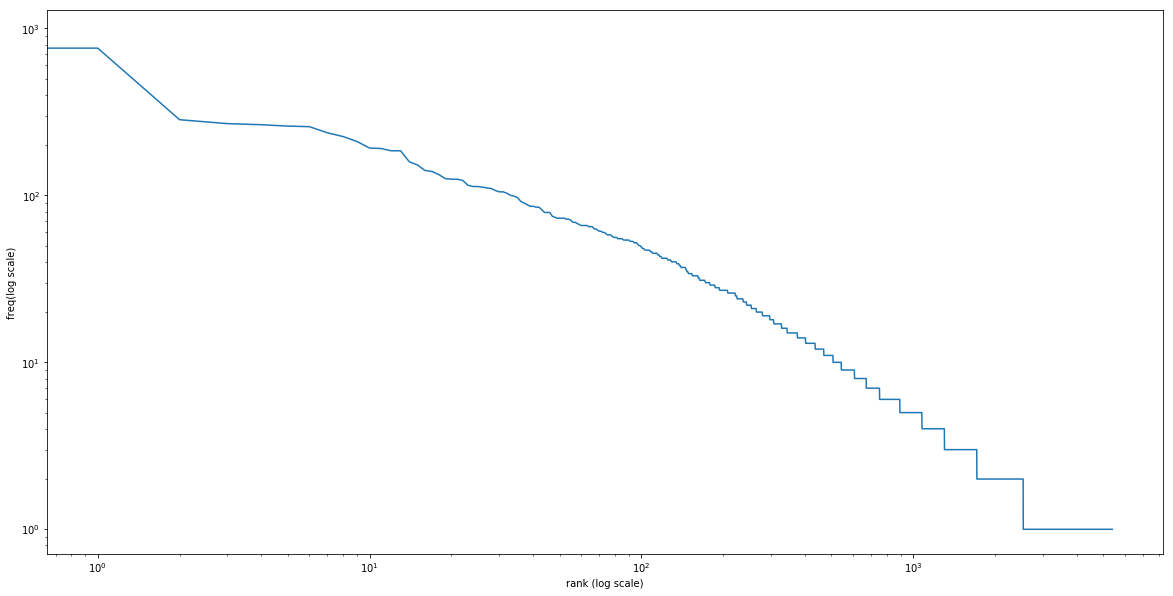

In [28]:
log_freq  = []
for i in f_list_new[0].values():
    log_freq.append(i)
    
#take a log log graph
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(log_freq, reverse=True))
plt.xscale("log")
plt.yscale("log")
plt.ylabel('freq(log scale)')
plt.xlabel('rank (log scale)')
plt.show()

In [29]:
#順位チェック
sorted(f_list_new[0].items(), key=lambda x: x[1], reverse=True)

[('said', 912),
 ('colonel', 762),
 ('know', 284),
 ('one', 269),
 ('good', 265),
 ('like', 260),
 ('would', 258),
 ('thought', 237),
 ('look', 225),
 ('love', 210),
 ('could', 192),
 ('girl', 191),
 ('go', 185),
 ('think', 185),
 ('tell', 159),
 ('get', 152),
 ('time', 141),
 ('never', 139),
 ('want', 133),
 ('take', 126),
 ('see', 125),
 ('yes', 125),
 ('well', 123),
 ('thing', 115),
 ('make', 113),
 ('maestro', 113),
 ('gran', 112),
 ('come', 111),
 ('say', 110),
 ('man', 107),
 ('let', 105),
 ('old', 105),
 ('ever', 103),
 ('two', 100),
 ('daughter', 99),
 ('much', 97),
 ('hand', 92),
 ('pleas', 90),
 ('right', 88),
 ('way', 86),
 ('back', 86),
 ('put', 85),
 ('hell', 85),
 ('alway', 82),
 ('long', 79),
 ('give', 79),
 ('boy', 79),
 ('told', 75),
 ('town', 74),
 ('ask', 73),
 ('came', 73),
 ('peopl', 73),
 ('portrait', 73),
 ('wish', 72),
 ('r', 72),
 ('better', 71),
 ('made', 69),
 ('bad', 69),
 ('shoot', 68),
 ('wind', 67),
 ('first', 66),
 ('place', 66),
 ('call', 66),
 ('even',

In [30]:
# let's make new list only with words whose frequency  > 25

moreThan15_freq = []

for i,j in f_list_new[0].items():
    if j >= 15:
        moreThan15_freq.append(i)

In [31]:
# 頻出単語top2のgameshとsaidが同時に現れる文を、ピックアップしカウントするプログラムを全ての単語に割り当てる試み。

count_s = {}

for wn1 in range(0, len(moreThan15_freq)-1):
    for wn2 in range(wn1+1, len(moreThan15_freq)):
        s = 0
    
        for sent in form_sent2:
            index1 = 0
            index2 = 0
            
            #remove duplicate
            if moreThan15_freq[wn1] != moreThan15_freq[wn2]:
                
                if moreThan15_freq[wn1] in sent.split():
                    index1 += 1
                if moreThan15_freq[wn2] in sent.split():
                    index2 += 1
              
                if index1 > 0 and index2 > 0:
                    s += 1
                
        count_s.update({( moreThan15_freq[wn1], moreThan15_freq[wn2]) :s })
        

In [32]:
count_s

{('start', 'two'): 1,
 ('start', 'hour'): 1,
 ('start', 'first'): 3,
 ('start', 'break'): 1,
 ('start', 'ice'): 3,
 ('start', 'across'): 1,
 ('start', 'canal'): 2,
 ('start', 'boat'): 1,
 ('start', 'gone'): 1,
 ('start', 'ahead'): 1,
 ('start', 'could'): 1,
 ('start', 'see'): 0,
 ('start', 'hear'): 0,
 ('start', 'long'): 0,
 ('start', 'shooter'): 0,
 ('start', 'shoot'): 0,
 ('start', 'top'): 0,
 ('start', 'one'): 1,
 ('start', 'live'): 1,
 ('start', 'dog'): 0,
 ('start', 'sound'): 0,
 ('start', 'duck'): 1,
 ('start', 'four'): 0,
 ('start', 'went'): 1,
 ('start', 'toward'): 1,
 ('start', 'big'): 1,
 ('start', 'turn'): 0,
 ('start', 'side'): 3,
 ('start', 'water'): 0,
 ('start', 'cold'): 0,
 ('start', 'night'): 0,
 ('start', 'boatman'): 1,
 ('start', 'would'): 3,
 ('start', 'glass'): 1,
 ('start', 'made'): 1,
 ('start', 'littl'): 0,
 ('start', 'give'): 0,
 ('start', 'said'): 0,
 ('start', 'feel'): 0,
 ('start', 'heard'): 0,
 ('start', 'took'): 0,
 ('start', 'hand'): 0,
 ('start', 'hold')

In [33]:
#順位チェック
sorted(count_s.items(), key=lambda x: x[1], reverse=True)

[(('said', 'colonel'), 418),
 (('gran', 'maestro'), 100),
 (('said', 'girl'), 99),
 (('thought', 'colonel'), 74),
 (('said', 'know'), 72),
 (('good', 'colonel'), 65),
 (('said', 'maestro'), 62),
 (('said', 'good'), 61),
 (('said', 'gran'), 61),
 (('know', 'colonel'), 61),
 (('said', 'yes'), 58),
 (('would', 'said'), 55),
 (('said', 'love'), 55),
 (('one', 'colonel'), 53),
 (('like', 'colonel'), 53),
 (('would', 'colonel'), 49),
 (('look', 'colonel'), 49),
 (('said', 'like'), 48),
 (('said', 'think'), 46),
 (('said', 'let'), 45),
 (('one', 'said'), 44),
 (('would', 'like'), 44),
 (('said', 'want'), 44),
 (('think', 'colonel'), 43),
 (('said', 'tell'), 42),
 (('said', 'take'), 41),
 (('love', 'colonel'), 41),
 (('said', 'look'), 40),
 (('said', 'go'), 39),
 (('could', 'said'), 37),
 (('said', 'get'), 36),
 (('told', 'colonel'), 35),
 (('colonel', 'tell'), 35),
 (('said', 'pleas'), 34),
 (('said', 'never'), 33),
 (('like', 'look'), 33),
 (('go', 'colonel'), 33),
 (('colonel', 'take'), 32)

In [34]:
#namely

new = {tuple(sorted(x)):y for x, y in count_s.items()}

In [35]:
#順位チェック again !
new2 = dict(sorted(new.items(), key=lambda x: x[1], reverse=True))
new2

{('colonel', 'said'): 418,
 ('gran', 'maestro'): 100,
 ('girl', 'said'): 99,
 ('colonel', 'thought'): 74,
 ('know', 'said'): 72,
 ('colonel', 'good'): 65,
 ('maestro', 'said'): 62,
 ('good', 'said'): 61,
 ('gran', 'said'): 61,
 ('colonel', 'know'): 61,
 ('said', 'yes'): 58,
 ('said', 'would'): 55,
 ('love', 'said'): 55,
 ('colonel', 'one'): 53,
 ('colonel', 'like'): 53,
 ('colonel', 'would'): 49,
 ('colonel', 'look'): 49,
 ('like', 'said'): 48,
 ('said', 'think'): 46,
 ('let', 'said'): 45,
 ('one', 'said'): 44,
 ('like', 'would'): 44,
 ('said', 'want'): 44,
 ('colonel', 'think'): 43,
 ('said', 'tell'): 42,
 ('said', 'take'): 41,
 ('colonel', 'love'): 41,
 ('look', 'said'): 40,
 ('go', 'said'): 39,
 ('could', 'said'): 37,
 ('get', 'said'): 36,
 ('colonel', 'told'): 35,
 ('colonel', 'tell'): 35,
 ('pleas', 'said'): 34,
 ('never', 'said'): 33,
 ('like', 'look'): 33,
 ('colonel', 'go'): 33,
 ('colonel', 'take'): 32,
 ('colonel', 'want'): 32,
 ('colonel', 'yes'): 32,
 ('said', 'say'): 31,
 

In [36]:
new3 = dict((k, v) for k, v in new2.items() if v >= 2)
new3

{('colonel', 'said'): 418,
 ('gran', 'maestro'): 100,
 ('girl', 'said'): 99,
 ('colonel', 'thought'): 74,
 ('know', 'said'): 72,
 ('colonel', 'good'): 65,
 ('maestro', 'said'): 62,
 ('good', 'said'): 61,
 ('gran', 'said'): 61,
 ('colonel', 'know'): 61,
 ('said', 'yes'): 58,
 ('said', 'would'): 55,
 ('love', 'said'): 55,
 ('colonel', 'one'): 53,
 ('colonel', 'like'): 53,
 ('colonel', 'would'): 49,
 ('colonel', 'look'): 49,
 ('like', 'said'): 48,
 ('said', 'think'): 46,
 ('let', 'said'): 45,
 ('one', 'said'): 44,
 ('like', 'would'): 44,
 ('said', 'want'): 44,
 ('colonel', 'think'): 43,
 ('said', 'tell'): 42,
 ('said', 'take'): 41,
 ('colonel', 'love'): 41,
 ('look', 'said'): 40,
 ('go', 'said'): 39,
 ('could', 'said'): 37,
 ('get', 'said'): 36,
 ('colonel', 'told'): 35,
 ('colonel', 'tell'): 35,
 ('pleas', 'said'): 34,
 ('never', 'said'): 33,
 ('like', 'look'): 33,
 ('colonel', 'go'): 33,
 ('colonel', 'take'): 32,
 ('colonel', 'want'): 32,
 ('colonel', 'yes'): 32,
 ('said', 'say'): 31,
 

In [37]:
#順位チェック again !
new4 = dict(sorted(new3.items(), key=lambda x: x[1], reverse=True))
new4

{('colonel', 'said'): 418,
 ('gran', 'maestro'): 100,
 ('girl', 'said'): 99,
 ('colonel', 'thought'): 74,
 ('know', 'said'): 72,
 ('colonel', 'good'): 65,
 ('maestro', 'said'): 62,
 ('good', 'said'): 61,
 ('gran', 'said'): 61,
 ('colonel', 'know'): 61,
 ('said', 'yes'): 58,
 ('said', 'would'): 55,
 ('love', 'said'): 55,
 ('colonel', 'one'): 53,
 ('colonel', 'like'): 53,
 ('colonel', 'would'): 49,
 ('colonel', 'look'): 49,
 ('like', 'said'): 48,
 ('said', 'think'): 46,
 ('let', 'said'): 45,
 ('one', 'said'): 44,
 ('like', 'would'): 44,
 ('said', 'want'): 44,
 ('colonel', 'think'): 43,
 ('said', 'tell'): 42,
 ('said', 'take'): 41,
 ('colonel', 'love'): 41,
 ('look', 'said'): 40,
 ('go', 'said'): 39,
 ('could', 'said'): 37,
 ('get', 'said'): 36,
 ('colonel', 'told'): 35,
 ('colonel', 'tell'): 35,
 ('pleas', 'said'): 34,
 ('never', 'said'): 33,
 ('like', 'look'): 33,
 ('colonel', 'go'): 33,
 ('colonel', 'take'): 32,
 ('colonel', 'want'): 32,
 ('colonel', 'yes'): 32,
 ('said', 'say'): 31,
 

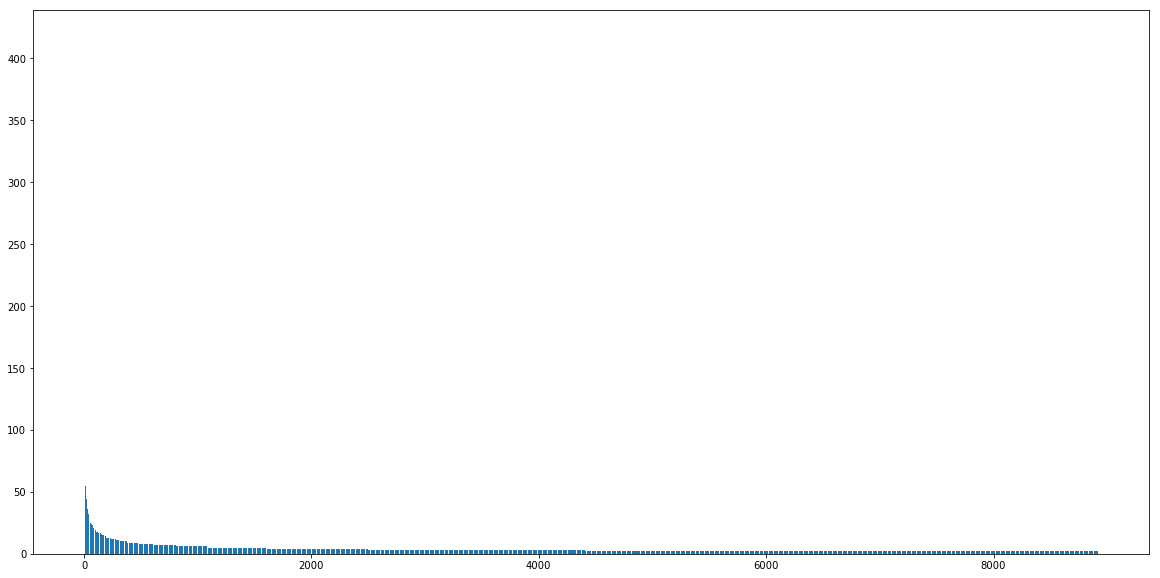

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.bar(range(len(new4)), new4.values(), align='center')
# plt.xticks(range(len(new2)), new2.keys())  too many....
#plt.xticks(range(len(new4)), new4.keys())  


# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.show()

In [39]:
#単語順位チェック
word_f = sorted(f_list_new[0].items(), key=lambda x: x[1], reverse=True)
word_f

[('said', 912),
 ('colonel', 762),
 ('know', 284),
 ('one', 269),
 ('good', 265),
 ('like', 260),
 ('would', 258),
 ('thought', 237),
 ('look', 225),
 ('love', 210),
 ('could', 192),
 ('girl', 191),
 ('go', 185),
 ('think', 185),
 ('tell', 159),
 ('get', 152),
 ('time', 141),
 ('never', 139),
 ('want', 133),
 ('take', 126),
 ('see', 125),
 ('yes', 125),
 ('well', 123),
 ('thing', 115),
 ('make', 113),
 ('maestro', 113),
 ('gran', 112),
 ('come', 111),
 ('say', 110),
 ('man', 107),
 ('let', 105),
 ('old', 105),
 ('ever', 103),
 ('two', 100),
 ('daughter', 99),
 ('much', 97),
 ('hand', 92),
 ('pleas', 90),
 ('right', 88),
 ('way', 86),
 ('back', 86),
 ('put', 85),
 ('hell', 85),
 ('alway', 82),
 ('long', 79),
 ('give', 79),
 ('boy', 79),
 ('told', 75),
 ('town', 74),
 ('ask', 73),
 ('came', 73),
 ('peopl', 73),
 ('portrait', 73),
 ('wish', 72),
 ('r', 72),
 ('better', 71),
 ('made', 69),
 ('bad', 69),
 ('shoot', 68),
 ('wind', 67),
 ('first', 66),
 ('place', 66),
 ('call', 66),
 ('even',

In [40]:
word_fdic = dict(word_f)
word_fdic

{'said': 912,
 'colonel': 762,
 'know': 284,
 'one': 269,
 'good': 265,
 'like': 260,
 'would': 258,
 'thought': 237,
 'look': 225,
 'love': 210,
 'could': 192,
 'girl': 191,
 'go': 185,
 'think': 185,
 'tell': 159,
 'get': 152,
 'time': 141,
 'never': 139,
 'want': 133,
 'take': 126,
 'see': 125,
 'yes': 125,
 'well': 123,
 'thing': 115,
 'make': 113,
 'maestro': 113,
 'gran': 112,
 'come': 111,
 'say': 110,
 'man': 107,
 'let': 105,
 'old': 105,
 'ever': 103,
 'two': 100,
 'daughter': 99,
 'much': 97,
 'hand': 92,
 'pleas': 90,
 'right': 88,
 'way': 86,
 'back': 86,
 'put': 85,
 'hell': 85,
 'alway': 82,
 'long': 79,
 'give': 79,
 'boy': 79,
 'told': 75,
 'town': 74,
 'ask': 73,
 'came': 73,
 'peopl': 73,
 'portrait': 73,
 'wish': 72,
 'r': 72,
 'better': 71,
 'made': 69,
 'bad': 69,
 'shoot': 68,
 'wind': 67,
 'first': 66,
 'place': 66,
 'call': 66,
 'even': 66,
 'though': 65,
 'except': 65,
 'talk': 65,
 'us': 63,
 'knew': 63,
 'mani': 62,
 'big': 61,
 'realli': 61,
 'mayb': 60,
 '

In [41]:
count = 0
s_value = []

for i, j in new2.items():
    #print (i)
    
    s = j / (word_fdic[i[0]]  * word_fdic[i[1]])
    s_value.append(s)
    
    count += 1
    
    if count == 1000:
        break

In [42]:
count = 0
p_values = []

for i, j in new2.items():
    #print (i)
    
    s = j / (word_fdic[i[0]]  * word_fdic[i[1]])
    p = (word_fdic[i[0]]  * word_fdic[i[1]]) * s * s
    p_values.append(p)
    
    count += 1
    
    if count == 1000:
        break

In [43]:
p_values

[0.251421697287839,
 0.7901390644753474,
 0.056265500137779,
 0.030322159097201457,
 0.02001482579688658,
 0.02092309216064973,
 0.03730010867877659,
 0.015396391923204241,
 0.03642896303258145,
 0.017194373590625114,
 0.02950877192982456,
 0.012856147150822794,
 0.01579469507101086,
 0.01370390968786894,
 0.014178275792449017,
 0.01221286292701784,
 0.01400408282298046,
 0.0097165991902834,
 0.012541488857278333,
 0.021146616541353382,
 0.007891475901650036,
 0.028861061419200952,
 0.015960955019126765,
 0.013116265872171386,
 0.012164846077457795,
 0.014628585352269562,
 0.010504936882889638,
 0.007797270955165692,
 0.0090149359886202,
 0.007818210891812866,
 0.009349030470914128,
 0.021434820647419073,
 0.010110764456329751,
 0.014083820662768032,
 0.008590496024233243,
 0.018615384615384614,
 0.007725047882528197,
 0.01066533349997917,
 0.010104000157875003,
 0.010750656167979003,
 0.009579346092503986,
 0.006151574803149606,
 0.018856065367693277,
 0.009968102073365232,
 0.0110383

In [44]:
max(p_values)

0.7901390644753474

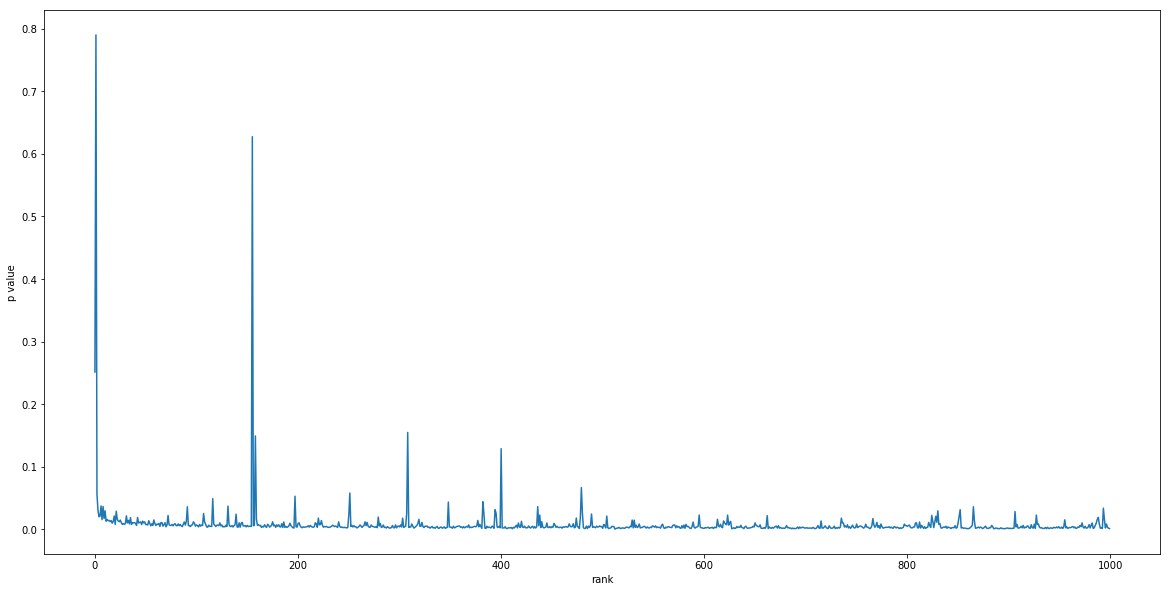

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(p_values)

plt.ylabel('p value')
plt.xlabel('rank')
plt.show()

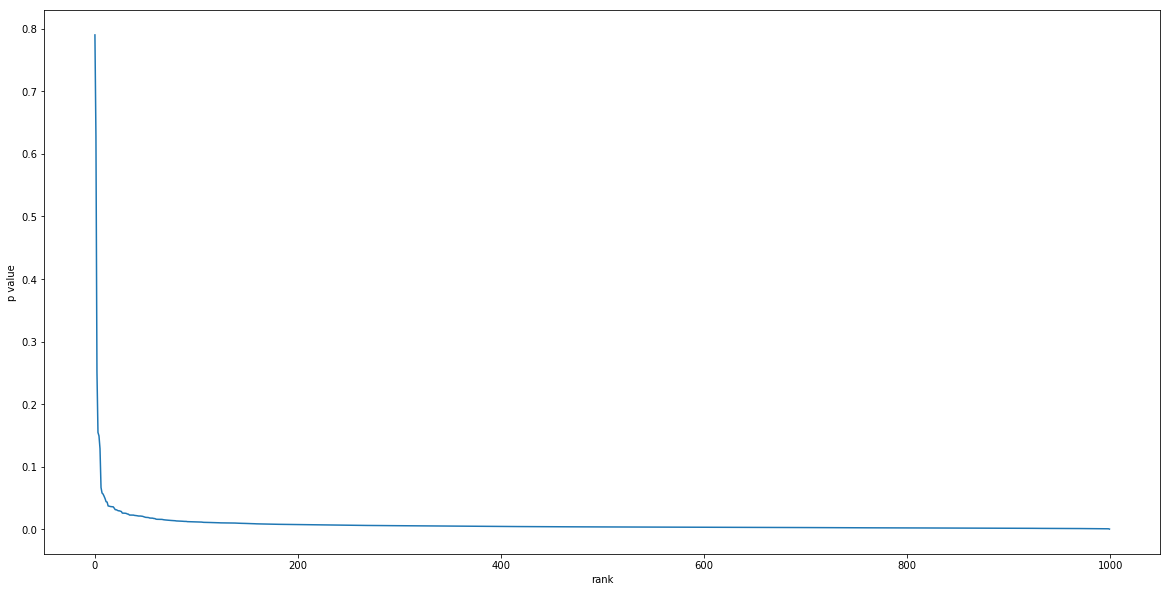

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(p_values, reverse=True))

plt.ylabel('p value')
plt.xlabel('rank')
plt.show()

In [47]:
s_value

[0.0006014873140857392,
 0.007901390644753476,
 0.0005683383852300909,
 0.0004097589067189386,
 0.00027798369162342475,
 0.0003218937255484574,
 0.0006016146561092998,
 0.0002523998675935121,
 0.0005971961152882205,
 0.0002818749768954937,
 0.0005087719298245614,
 0.00023374813001495988,
 0.00028717627401837927,
 0.00025856433373337625,
 0.0002675146375933777,
 0.00024924210055138454,
 0.0002857976086322543,
 0.00020242914979757084,
 0.00027264106211474635,
 0.00046992481203007516,
 0.0001793517250375008,
 0.0006559332140727489,
 0.00036274897770742644,
 0.0003050294388877066,
 0.0002896391923204237,
 0.0003567947646895015,
 0.0002562179727534058,
 0.0001949317738791423,
 0.00023115220483641537,
 0.00021130299707602338,
 0.0002596952908587258,
 0.0006124234470691164,
 0.0002888789844665643,
 0.0004142300194931774,
 0.00026031806134040134,
 0.0005641025641025641,
 0.00023409236007661204,
 0.00033329167187434906,
 0.00031575000493359385,
 0.00033595800524934384,
 0.00030901116427432216,


In [48]:
print(max(s_value))
print(s_value.index(max(s_value)))
print(s_value[155])

0.0392156862745098
155
0.0392156862745098


In [49]:
def second_largest(numbers):
    count = 0
    m1 = m2 = float('-inf')
    for x in numbers:
        count += 1
        if x > m2:
            if x >= m1:
                m1, m2 = x, m1            
            else:
                m2 = x
    return m2 if count >= 2 else None

In [50]:
s_value_top_5 = sorted(s_value, reverse=True)[:6]
s_value_top_5

[0.0392156862745098,
 0.014308426073131956,
 0.014066496163682864,
 0.009946949602122016,
 0.008333333333333333,
 0.007901390644753476]

In [51]:
print(s_value.index(s_value_top_5[0]))
print(s_value.index(s_value_top_5[1]))
print(s_value.index(s_value_top_5[2]))
print(s_value.index(s_value_top_5[3]))
print(s_value.index(s_value_top_5[4]))

155
400
308
158
479


In [52]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[0]):
        print(i,j)
    count += 1
    
for i,j in word_fdic.items():
    if i == 'bitch':
        print(i,j)
    elif i ==  'son':
        print(i,j)

('bitch', 'son') 16
son 24
bitch 17


In [53]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[1]):
        print(i,j)
    count += 1
    
for i,j in word_fdic.items():
    if i == 'glass':
        print(i,j)
    elif i ==  'valpolicella':
        print(i,j)

('glass', 'valpolicella') 9
glass 37
valpolicella 17


In [54]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[2]):
        print(i,j)
    count += 1
    
    
for i,j in word_fdic.items():
    if i == 'second':
        print(i,j)
    elif i ==  'waiter':
        print(i,j)

('second', 'waiter') 11
waiter 34
second 23


In [55]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[3]):
        print(i,j)
    count += 1
    
    
for i,j in word_fdic.items():
    if i == 'canal':
        print(i,j)
    elif i ==  'grand':
        print(i,j)

('canal', 'grand') 15
canal 58
grand 26


In [56]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[4]):
        print(i,j)
    count += 1
    
    
for i,j in word_fdic.items():
    if i == 'break':
        print(i,j)
    elif i ==  'ice':
        print(i,j)

('break', 'ice') 8
ice 40
break 24


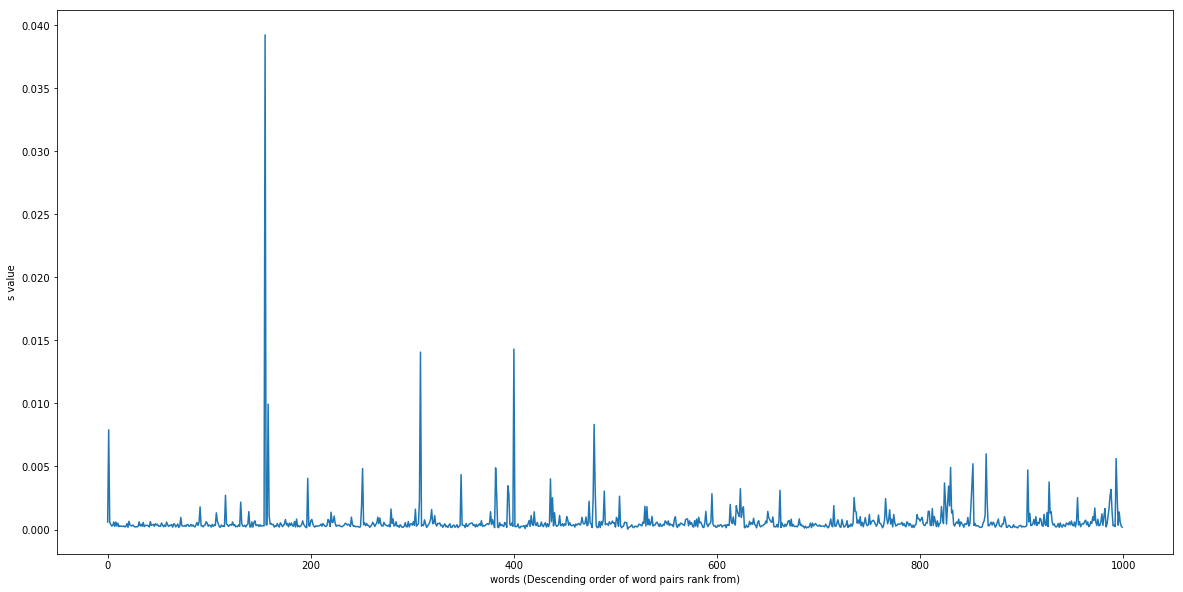

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(s_value)

plt.ylabel('s value')
plt.xlabel('words (Descending order of word pairs rank from)')
plt.show()

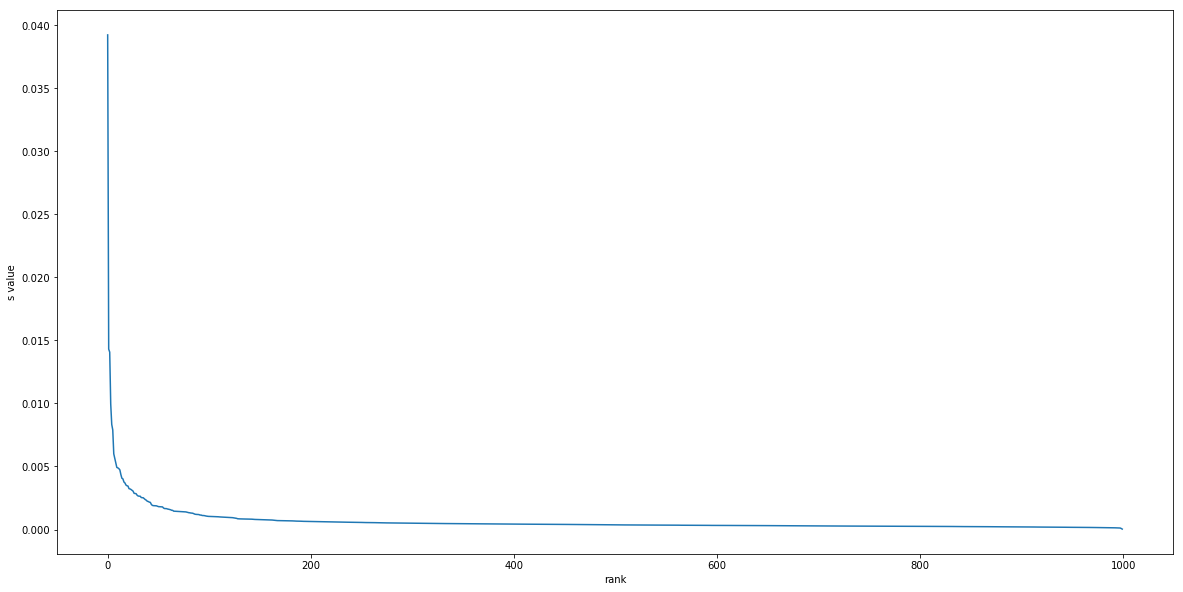

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(s_value, reverse=True))

plt.ylabel('s value')
plt.xlabel('rank')
plt.show()

In [59]:
from math import log
log_list = [log(y,10) for y in s_value]
log_list

[-3.220773527892981,
 -2.1022964661536014,
 -3.2453930109785936,
 -3.387471597618728,
 -3.555980681944185,
 -3.4922874886335524,
 -3.2206815923135816,
 -3.597910877254457,
 -3.2238830259878304,
 -3.5499434763758706,
 -3.293476857773535,
 -3.631251854797402,
 -3.5418514435680915,
 -3.587431381741219,
 -3.572652449709629,
 -3.6033785972743164,
 -3.543941409422449,
 -3.6937269489236466,
 -3.5644087350498554,
 -3.3279716236230104,
 -3.7462944418446362,
 -3.1831403774478604,
 -3.4403938028093144,
 -3.5156582441630277,
 -3.538142672250967,
 -3.4475815267262435,
 -3.5913904093537843,
 -3.710117365111816,
 -3.63610195970493,
 -3.6750943429649703,
 -3.5855359255059014,
 -3.2129481903810246,
 -3.539284051309776,
 -3.382758430725486,
 -3.5844956987046235,
 -3.248641926204293,
 -3.6306127598647264,
 -3.477175538137257,
 -3.50065663398678,
 -3.4737150060277506,
 -3.5100258296523683,
 -3.6881349453234877,
 -3.201670179646581,
 -3.478508778206303,
 -3.4342174943051473,
 -3.3906001560402594,
 -3.58750

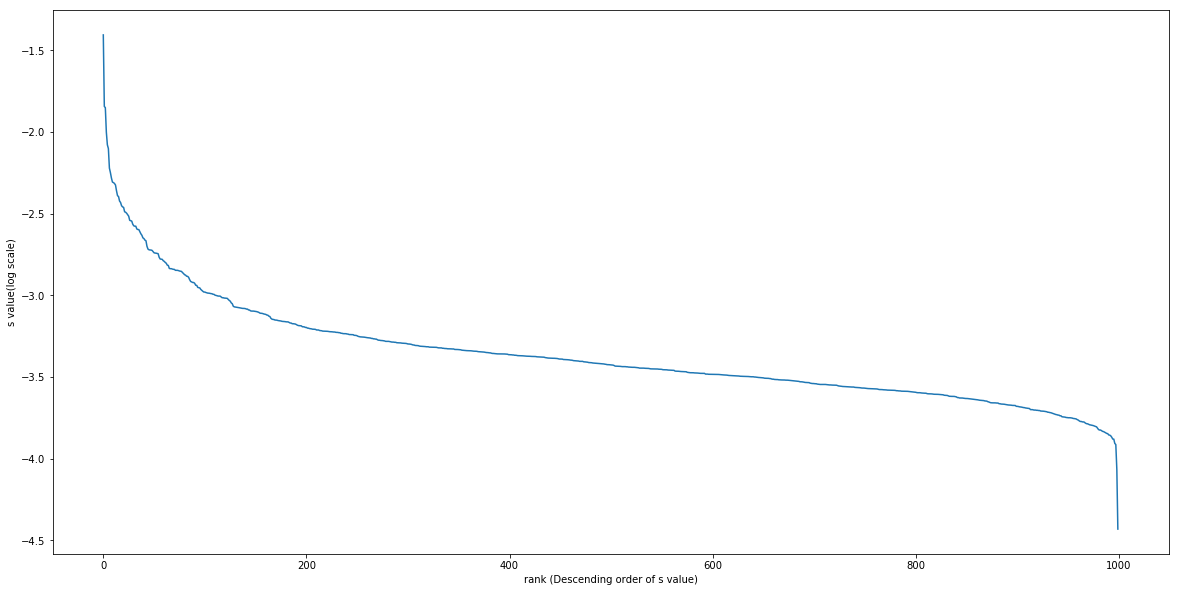

In [60]:
#take a log
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(log_list, reverse=True))

plt.ylabel('s value(log scale)')
plt.xlabel('rank (Descending order of s value)')
plt.show()

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


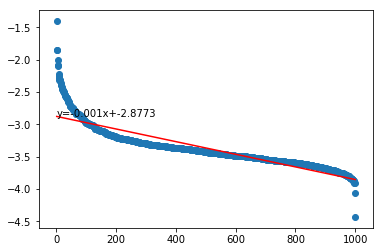

In [61]:
#take a log
import matplotlib.pyplot as plt
import numpy as np

x = range(1, len(log_list)+1)
y = sorted(log_list, reverse=True)


plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
a, b = np.polyfit(x, y, deg=1)
#fit = np.polyfit(x, y, deg=1)
# フィッティング直線
y2 = a * x + b

ax.plot(x, y2, color='red')
ax.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
ax.scatter(x, y)
#plt.figure(figsize=(20,10))
#plt.plot(x, y)

#plt.ylabel('s value')
#plt.xlabel('words (Descending order of s value)')
#plt.show()

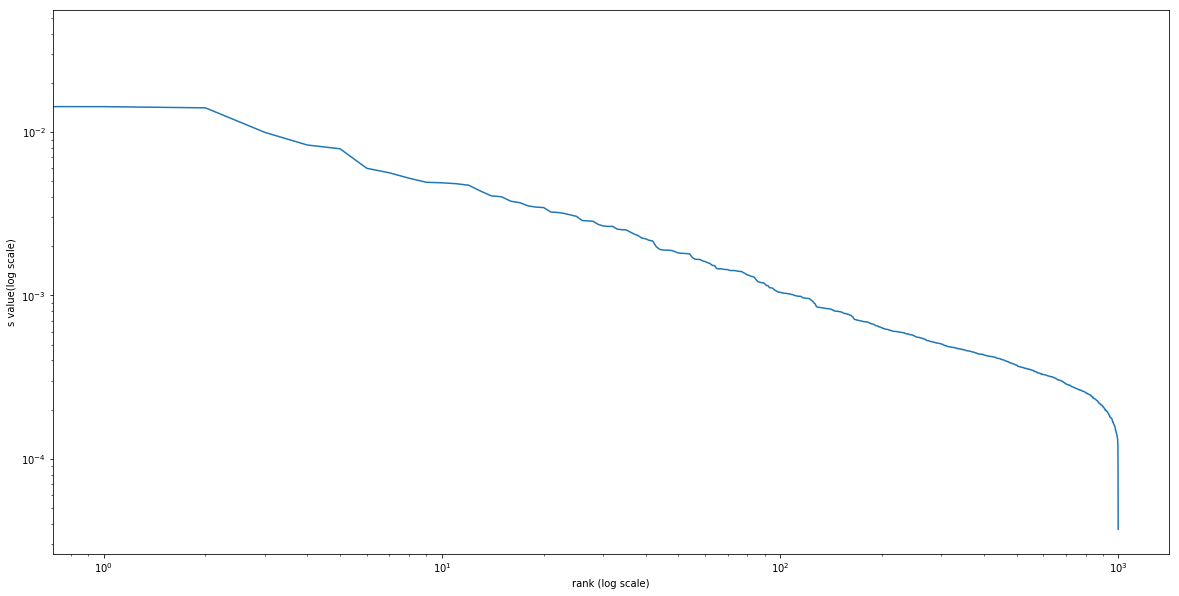

In [62]:
#take a log log graph
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(s_value, reverse=True))
plt.xscale("log")
plt.yscale("log")
plt.ylabel('s value(log scale)')
plt.xlabel('rank (log scale)')
plt.show()

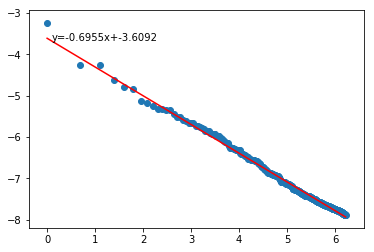

In [80]:
#take a log
import matplotlib.pyplot as plt
import numpy as np
from math import log

sorted_list = sorted(s_value, reverse=True)

log_list = [log(i) for i in sorted_list]
log_x = [log(i) for i in  range(1, len(s_value)+1)]

x = np.array(log_x[:-500])
y = np.array(log_list[:-500])


plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
a, b = np.polyfit(x, y, deg=1)
#fit = np.polyfit(x, y, deg=1)
# フィッティング直線
y2 = a * x + b

ax.plot(x, y2, color='red')
ax.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
ax.scatter(x, y)
#plt.figure(figsize=(20,10))
#plt.plot(x, y)

#plt.ylabel('s value')
#plt.xlabel('words (Descending order of s value)')
#plt.show()

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


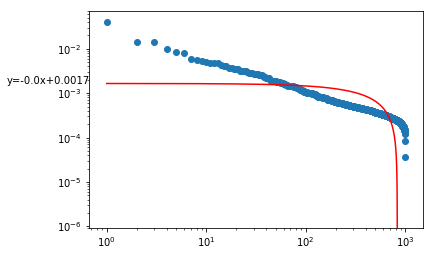

In [63]:
#take a log log graph
import matplotlib.pyplot as plt
import numpy as np

x = range(1, len(s_value)+1)
y = sorted(s_value, reverse=True)


plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
a, b = np.polyfit(x, y, deg=1)
#fit = np.polyfit(x, y, deg=1)
# フィッティング直線
y2 = a * x + b

ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(x, y2, color='red')
ax.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
ax.scatter(x, y)


In [64]:
# i,j count
import numpy as np

len(word_f)

5398

In [65]:
i = np.arange(len(word_f), 0, -1)
j = np.arange(1,len(word_f)+1, 1)

In [66]:
i_j = i*j

In [67]:
i_j

array([ 5398, 10794, 16188, ..., 16188, 10794,  5398])

In [68]:
def square(list):
    return [i ** -2 for i in list]
square(i)

[3.431896956332955e-08,
 3.4331688536467238e-08,
 3.4344414581594361e-08,
 3.4357147703954767e-08,
 3.4369887908797163e-08,
 3.4382635201375139e-08,
 3.4395389586947139e-08,
 3.4408151070776503e-08,
 3.4420919658131423e-08,
 3.4433695354285018e-08,
 3.4446478164515275e-08,
 3.4459268094105093e-08,
 3.447206514834226e-08,
 3.4484869332519488e-08,
 3.4497680651934412e-08,
 3.4510499111889558e-08,
 3.4523324717692414e-08,
 3.4536157474655379e-08,
 3.4548997388095795e-08,
 3.4561844463335948e-08,
 3.4574698705703071e-08,
 3.4587560120529344e-08,
 3.4600428713151928e-08,
 3.4613304488912927e-08,
 3.4626187453159422e-08,
 3.4639077611243484e-08,
 3.4651974968522145e-08,
 3.4664879530357442e-08,
 3.4677791302116387e-08,
 3.4690710289171009e-08,
 3.4703636496898327e-08,
 3.4716569930680386e-08,
 3.4729510595904225e-08,
 3.4742458497961923e-08,
 3.4755413642250575e-08,
 3.4768376034172305e-08,
 3.4781345679134295e-08,
 3.4794322582548746e-08,
 3.4807306749832926e-08,
 3.4820298186409141e-08,
 3

In [69]:
square(i_j)

[3.431896956332955e-08,
 8.5829221341168094e-09,
 3.8160460646215959e-09,
 2.147321731497173e-09,
 1.3747955163518865e-09,
 9.5507320003819825e-10,
 7.0194672626422741e-10,
 5.3762736048088285e-10,
 4.2494962540902996e-10,
 3.4433695354285022e-10,
 2.8468163772326675e-10,
 2.3930047287572981e-10,
 2.0397671685409621e-10,
 1.7594321088020149e-10,
 1.5332302511970849e-10,
 1.3480663715581859e-10,
 1.1945787099547549e-10,
 1.0659307862547957e-10,
 9.5703593872841541e-11,
 8.6404611158339869e-11,
 7.8400677337195167e-11,
 7.1461901075473856e-11,
 6.5407237643009313e-11,
 6.0092542515473835e-11,
 5.540189992505508e-11,
 5.124123906988681e-11,
 4.7533573345023519e-11,
 4.4215407564231426e-11,
 4.1233996792052775e-11,
 3.8545233654634452e-11,
 3.611200467939472e-11,
 3.3902900322930065e-11,
 3.1891194302942353e-11,
 3.0054029842527613e-11,
 2.8371766238571894e-11,
 2.6827450643651472e-11,
 2.5406388370441414e-11,
 2.4095791262152871e-11,
 2.2884488329936176e-11,
 2.1762686366505713e-11,
 2.07

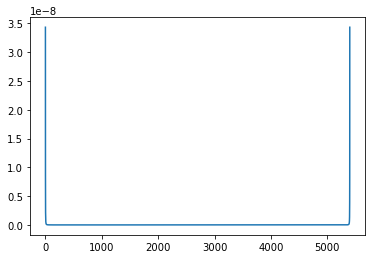

In [70]:
plt.plot(square(i_j))

In [71]:
meddle = len(square(j)) / 2
print(meddle)

meddle = len(square(i)) / 2
print (meddle)

2699.0
2699.0


In [72]:
square(j)[2699]

1.3717421124828532e-07

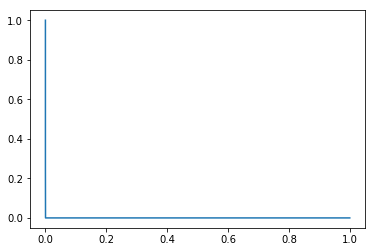

In [73]:
plt.plot(square(i), square(j))

In [74]:
import numpy as np
from scipy import integrate

def computePi(x):
    return (2699**2) / (x)

myu = integrate.quad(computePi, 1, 2699**2)

In [75]:
# 結果にはintegrated value and estimation error
myu

(115105970.74365513, 0.003705156406365262)

In [76]:
(2699**2) * log(2699**2)

115105970.74365515

In [77]:
import numpy as np
from scipy import integrate

def computePi(x):
    return (1.3717421124828532e-07**2) / (x)

myu = integrate.quad(computePi, 1, (1.3717421124828532e-07**2))
print(myu)

(-1.581695053347202e-13, 1.75947289972942e-13)


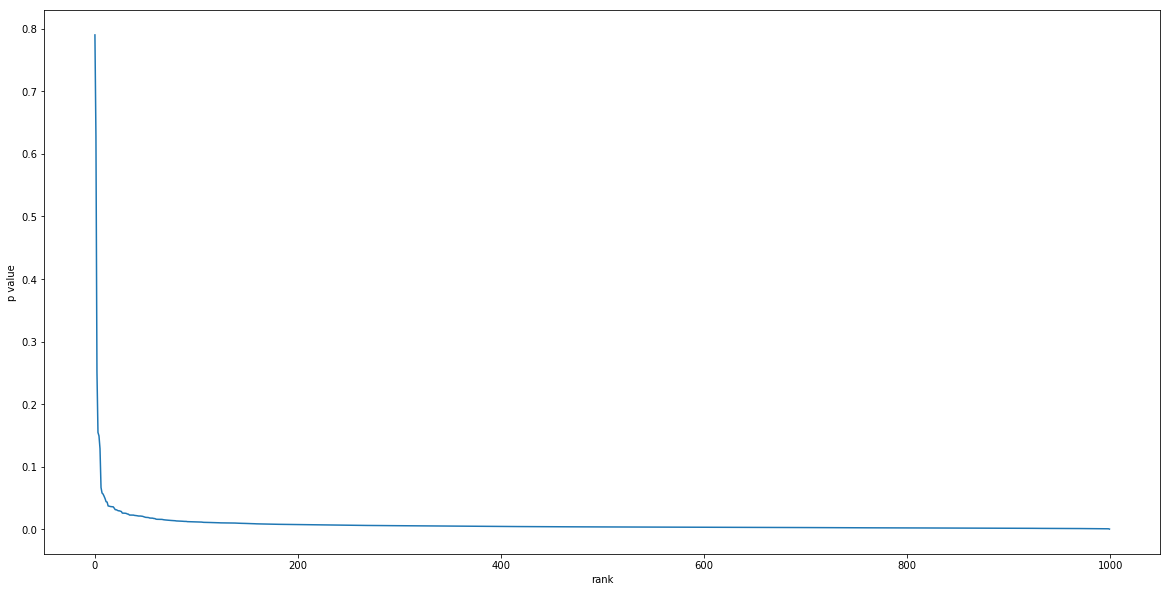

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(p_values, reverse=True))

plt.ylabel('p value')
plt.xlabel('rank')
plt.show()

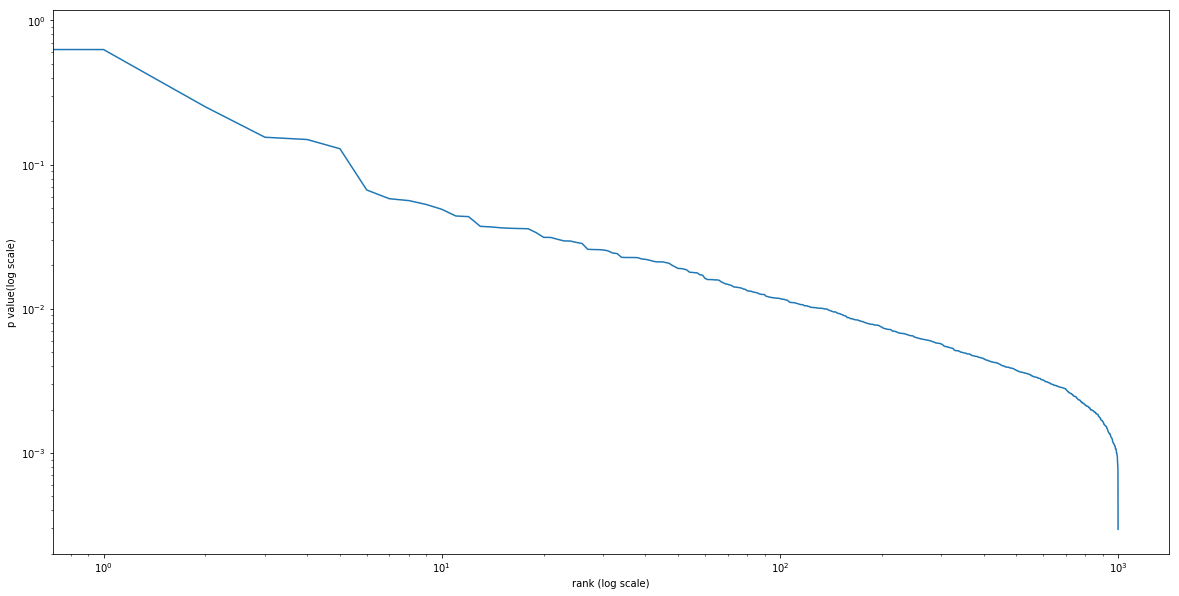

In [79]:
#take a log log graph
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(p_values, reverse=True))
plt.xscale("log")
plt.yscale("log")
plt.ylabel('p value(log scale)')
plt.xlabel('rank (log scale)')
plt.show()